In [1]:
import os
from scipy.stats import kurtosis
from locscale.include.emmer.pdb.pdb_utils import set_atomic_bfactors
from locscale.include.emmer.pdb.pdb_to_map import pdb2map
from locscale.include.emmer.ndimage.map_tools import compute_real_space_correlation as rscc
import gemmi 
from locscale.include.emmer.ndimage.map_utils import load_map


EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}


def map_quality_kurtosis(emmap, mask=None):
    if mask is None:
        emmap_array = emmap.flatten()
    else:
        emmap_array = emmap[mask > 0.5]
    k = kurtosis(emmap_array)
    return k

def map_quality_pdb(emmap, mask, st, apix, test='rscc'):
    
    size=emmap.shape
    st_0 = set_atomic_bfactors(input_gemmi_st=st, b_iso=0)
    simmap = pdb2map(st_0, apix=apix, size=size, verbose=False, set_refmac_blur=True)
    
    masked_emmap = emmap[mask > 0.5]
    masked_simmap = simmap[mask > 0.5]
    
    metric = rscc(masked_emmap, masked_simmap)

    return metric

def get_map_sharpness_score(emdb_pdb, pdb_path, map_path_dict):
    emdb, pdb = emdb_pdb.split("_")

    atomic_model_mask_path = os.path.join("/home/abharadwaj1/dev/data/atomic_model_mask", f"atomic_model_mask_{emdb_pdb}.mrc")
    atomic_model_mask = load_map(atomic_model_mask_path)[0]
    # Read the maps (key is the map type, value is the path to the map)
    st = gemmi.read_structure(pdb_path)

    kurtosis_dict = {}
    rscc_dict = {}


    for maptype, map_path in map_path_dict.items():
        emmap, apix = load_map(map_path)
        kurtosis_map = map_quality_kurtosis(emmap, mask=atomic_model_mask)
        rscc_map = map_quality_pdb(emmap, mask=atomic_model_mask, st=st, apix=apix)
        kurtosis_dict[maptype] = kurtosis_map
        rscc_dict[maptype] = rscc_map

    metrics = {
        "emdb_pdb": emdb_pdb,
        "kurtosis": kurtosis_dict,
        "rscc": rscc_dict
    }


    return metrics




In [2]:
input_files_local = {}

locscale_files_MB_path = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/model_based_version_C/Y_target"
locscale_files_MF_path = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/model_free_version_C/Y_target"
locscale_files_hybrid_path = "/home/abharadwaj1/dev/map_sharpening/emmernet/locscale_inputs/hybrid_version_C/Y_target"
emmernet_hybrid_files_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set"
emmernet_MB_files_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set_MB"
atomic_files_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/deposited_atomic_models"
confidence_map_files_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/confidence_masks"
unsharpened_map_files_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/unsharpened_maps"
deposited_map_files_folder = "/home/abharadwaj1/papers/elife_paper/figure_information/data/deposited_maps"
atomic_masks_folder = "/home/abharadwaj1/dev/data/atomic_model_mask"


for emdb_pdb in EMDB_PDB_ids_all:
    folder_containing_phenix_and_deposited_maps = f"/home/abharadwaj1/papers/elife_paper/figure_information/outputs/figure_3/qscores/{emdb_pdb}/"
    emdb, pdb = emdb_pdb.split("_")

    mb_locscale_path = os.path.join(locscale_files_MB_path, f"emd_{emdb}_model_based_locscale_C.mrc")
    mf_locscale_path = os.path.join(locscale_files_MF_path, f"emd_{emdb}_model_free_locscale_C1.mrc")
    hybrid_locscale_path = os.path.join(locscale_files_hybrid_path, f"emd_{emdb}_hybrid_locscale_C.mrc")
    emmernet_hybrid_map = os.path.join(emmernet_hybrid_files_path,f"{emdb_pdb}", f"emd_{emdb}_emmernet_output.mrc")
    emmernet_MB_map = os.path.join(emmernet_MB_files_path,f"{emdb_pdb}", f"emd_{emdb}_emmernet_output.mrc")
    pdb_path = os.path.join(atomic_files_folder, f"PDB_{pdb}_unrefined_shifted_servalcat_refined_shifted_servalcat_refined.pdb")
    deposited_map_path = os.path.join(deposited_map_files_folder, "emd_{}_deposited.map".format(emdb))
    unsharpened_map_path = os.path.join(unsharpened_map_files_folder, f"EMD_{int(emdb)}_unsharpened_fullmap.mrc")
    fdr_confidence_map_path = os.path.join(confidence_map_files_folder, f"emd_{emdb}_FDR_confidence_final.map")
    atomic_model_mask_path = os.path.join(atomic_masks_folder, f'atomic_model_mask_{emdb_pdb}.mrc')

    required_path_variables = [
        emmernet_hybrid_map, emmernet_MB_map, pdb_path, mb_locscale_path, hybrid_locscale_path, unsharpened_map_path, atomic_model_mask_path
    ]

    files_present = 1
    for path_variable in required_path_variables:
        if os.path.exists(path_variable):
            files_present = files_present * 1
        else:
            files_present = files_present * 0
            print("Missing file: {}".format(path_variable))
    if files_present == 0:
        print("Missing files for {}".format(emdb_pdb))
        continue
    else:
        input_files_local[emdb_pdb] = {
            "pdb_path": pdb_path,
            "map_dict": {
                "mb_locscale_path": mb_locscale_path,
                "hybrid_locscale_path": hybrid_locscale_path,
                "unsharpened_map_path": unsharpened_map_path,
                "emmernet_hybrid_map": emmernet_hybrid_map,
                "emmernet_MB_map": emmernet_MB_map,
            }
        }
    

print("Total number of files: {}".format(len(input_files_local.keys())))
print("Missing files: {}".format(len(EMDB_PDB_ids_all) - len(input_files_local.keys())))

Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set/0026_6gl7/emd_0026_emmernet_output.mrc
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set_MB/0026_6gl7/emd_0026_emmernet_output.mrc
Missing files for 0026_6gl7
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set/7573_6crv/emd_7573_emmernet_output.mrc
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set_MB/7573_6crv/emd_7573_emmernet_output.mrc
Missing files for 7573_6crv
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set/0665_6oa9/emd_0665_emmernet_output.mrc
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set_MB/0665_6oa9/emd_0665_emmernet_output.mrc
Missing files for 0665_6oa9
Missing file: /home/abharadwaj1/papers/elife_paper/figure_information/outputs/emmernet_test_set/0

In [3]:
import joblib
from tqdm import tqdm
results = joblib.Parallel(n_jobs=20)(joblib.delayed(get_map_sharpness_score)(
    emdb_pdb,
    input_files_local[emdb_pdb]["pdb_path"],
    input_files_local[emdb_pdb]["map_dict"],
    ) for emdb_pdb in tqdm(input_files_local.keys()))

# dump the results to a pickle file
import pickle
with open("map_sharpness_scores.pkl", "wb") as f:
    pickle.dump(results, f)
    

100%|██████████| 10/10 [00:00<00:00, 825.15it/s]


In [20]:
keys

['mb_locscale_path',
 'hybrid_locscale_path',
 'unsharpened_map_path',
 'emmernet_hybrid_map',
 'emmernet_MB_map']

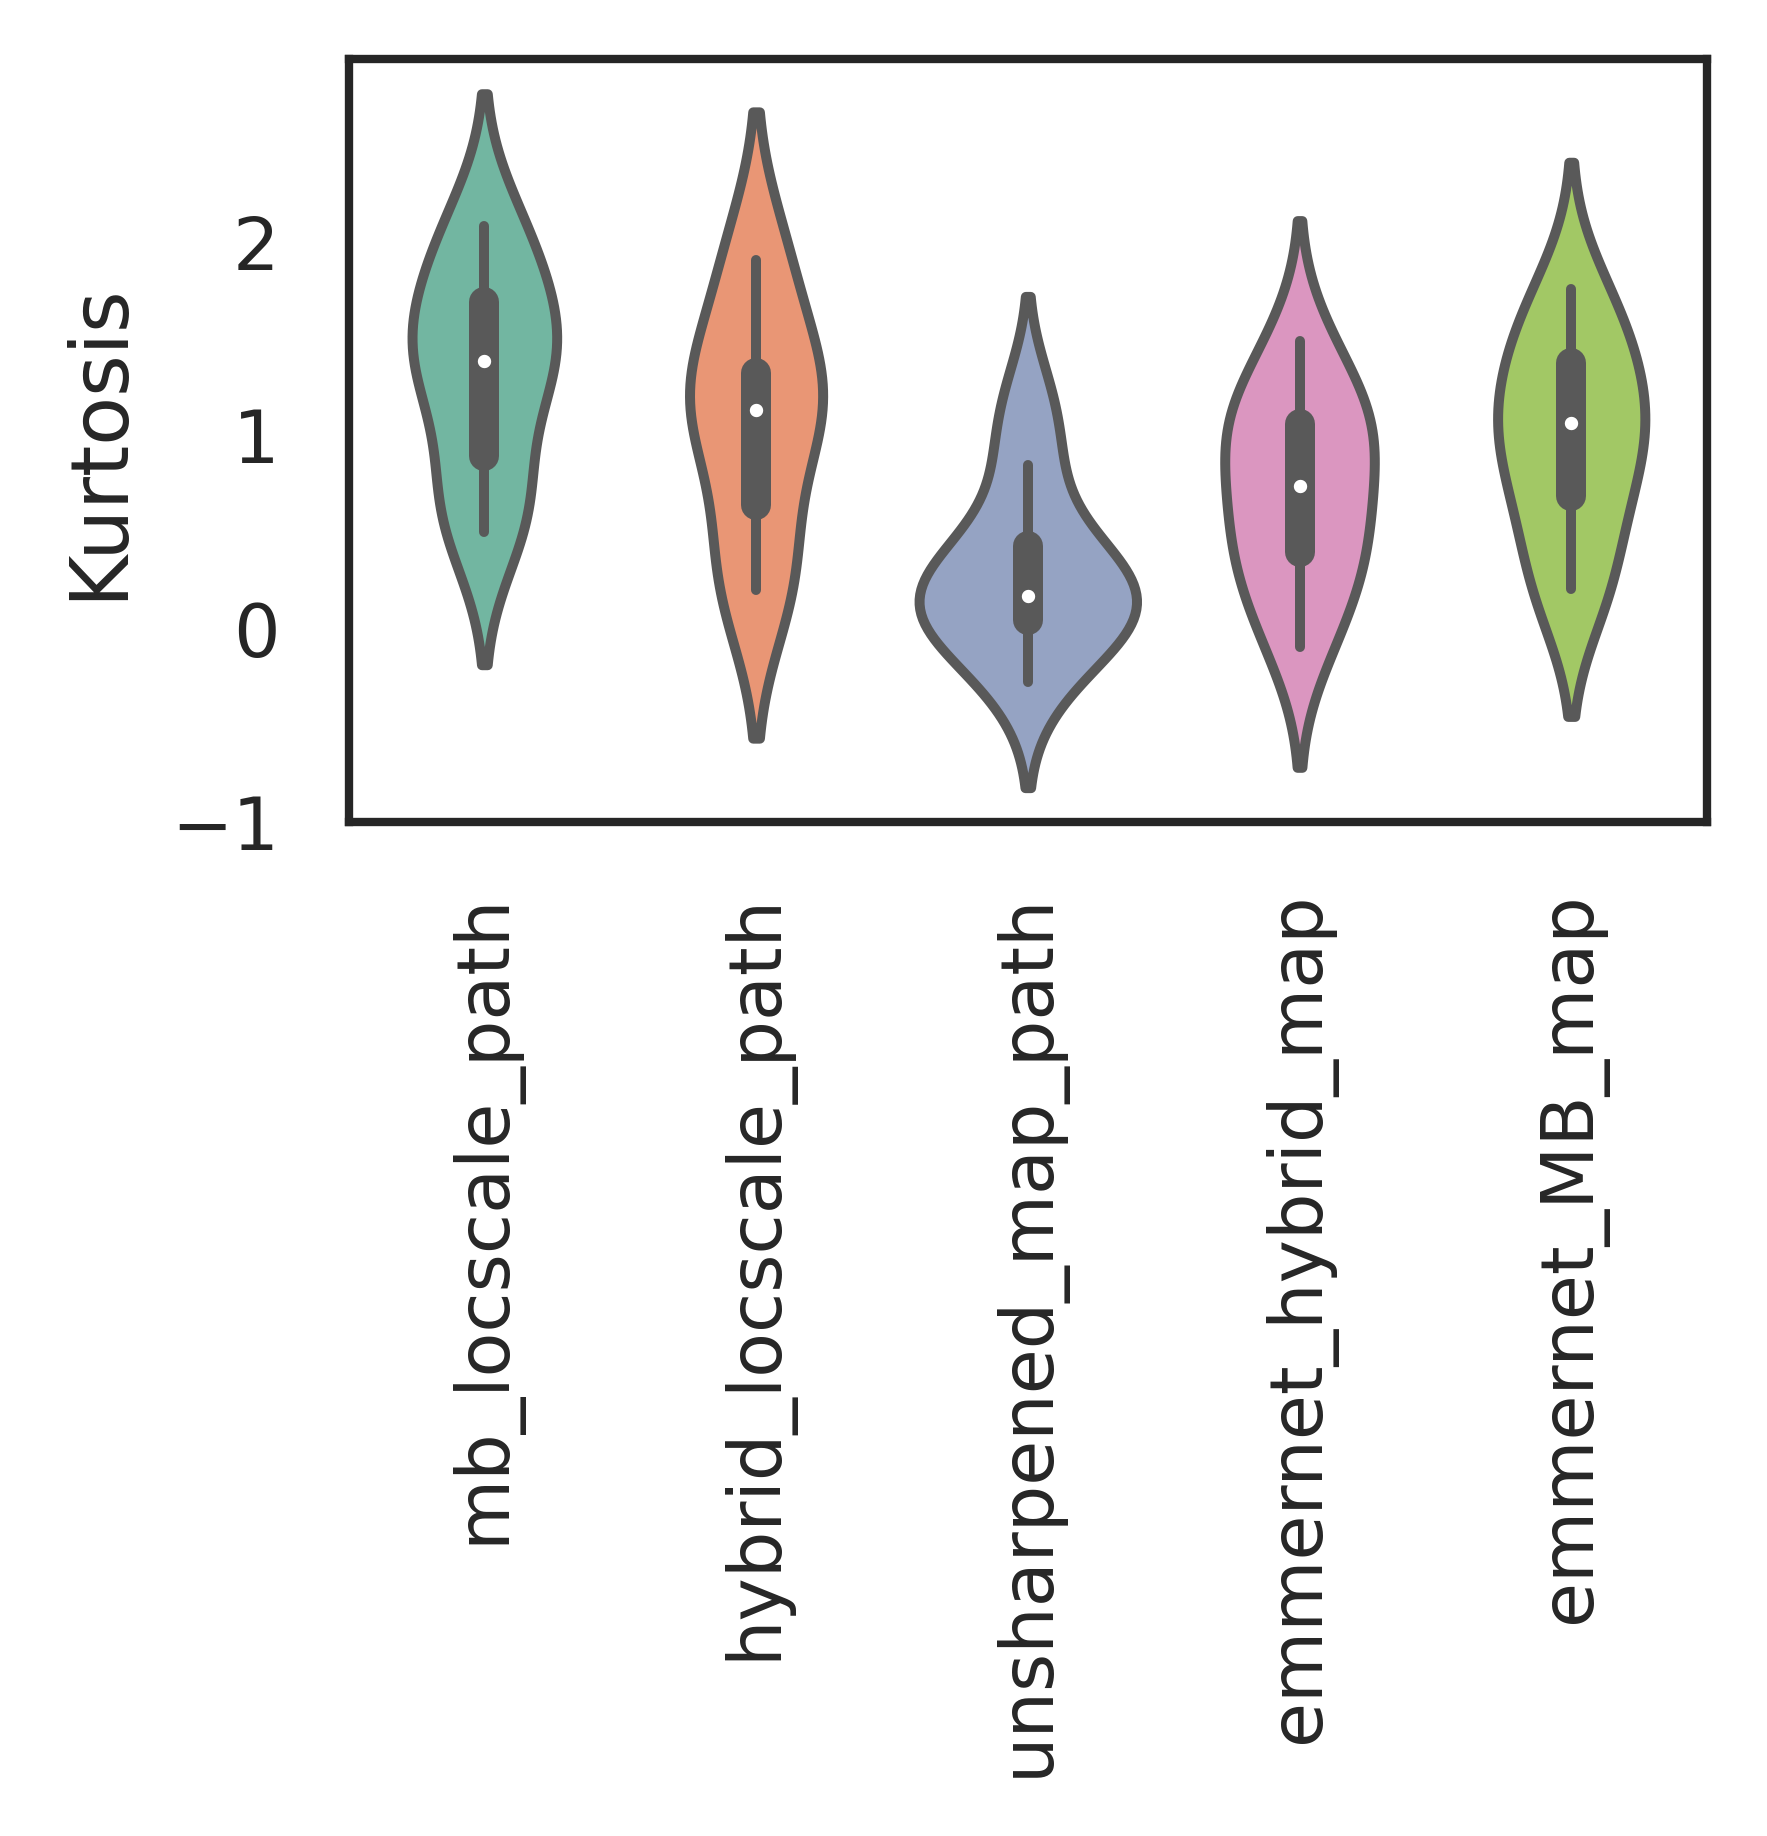

In [21]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# rscc_metrics_mb_locscale_map = [x["rscc"]["mb_locscale_path"] for x in results]
# rscc_metrics_hybrid_locscale_map = [x["rscc"]["hybrid_locscale_map"] for x in results]
# rscc_metrics_unsharpened_map = [x["rscc"]["unsharpened_map_path"] for x in results]
# rscc_metrics_emmernet_hybrid_map = [x["rscc"]["emmernet_hybrid_map"] for x in results]
# rscc_metrics_emmernet_MB_map = [x["rscc"]["emmernet_MB_map"] for x in results]

# kurtosis_metrics_mb_locscale_map = [x["kurtosis"]["mb_locscale_path"] for x in results]
# kurtosis_metrics_hybrid_locscale_map = [x["kurtosis"]["hybrid_locscale_map"] for x in results]
# kurtosis_metrics_unsharpened_map = [x["kurtosis"]["unsharpened_map_path"] for x in results]
# kurtosis_metrics_emmernet_hybrid_map = [x["kurtosis"]["emmernet_hybrid_map"] for x in results]
# kurtosis_metrics_emmernet_MB_map = [x["kurtosis"]["emmernet_MB_map"] for x in results]
temp_emdb_pdb = list(input_files_local.keys())[0]
keys = list(input_files_local[temp_emdb_pdb]["map_dict"].keys())

kurtosis_metrics = {}
rscc_metrics = {}
emdb_metric = {}

for key in keys:
    kurtosis_metrics[key] = []
    rscc_metrics[key] = []
    for result in results:
        kurtosis_metrics[key].append(result["kurtosis"][key])
        rscc_metrics[key].append(result["rscc"][key])
        emdb_pdb = result["emdb_pdb"]
        emdb_metric[emdb_pdb] = [result["kurtosis"][key], result["rscc"][key]]
       
rscc_emmernet_hybrid_map = rscc_metrics["emmernet_hybrid_map"]
rscc_emmernet_MB_map = rscc_metrics["emmernet_MB_map"]
kurtosis_emmernet_hybrid_map = kurtosis_metrics["emmernet_hybrid_map"]
kurtosis_emmernet_MB_map = kurtosis_metrics["emmernet_MB_map"]

# Plot the kurtosis metrics for lcoscale and deposited maps as violin plots
figsize_cm = (8, 8)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font="Helvetica", font_scale=1)
# Set font size for all text in the figure
sns.set_style("white")


## Plot the data
#kurtosis_data_list = [kurtosis_metrics_mb_locscale_map, kurtosis_metrics_hybrid_locscale_map, kurtosis_metrics_unsharpened_map, kurtosis_metrics_emmernet_hybrid_map, kurtosis_metrics_emmernet_MB_map]
kurtosis_data_list = list(kurtosis_metrics.values())
sns.violinplot(data=kurtosis_data_list, ax=ax1, palette="Set2")
plt.ylabel("Kurtosis")
plt.xticks(ticks=range(0,len(keys)), labels=keys, rotation=90)
plt.tight_layout()
plt.savefig("kurtosis_violin_plot_all_locscale.eps", dpi=600, bbox_inches="tight")


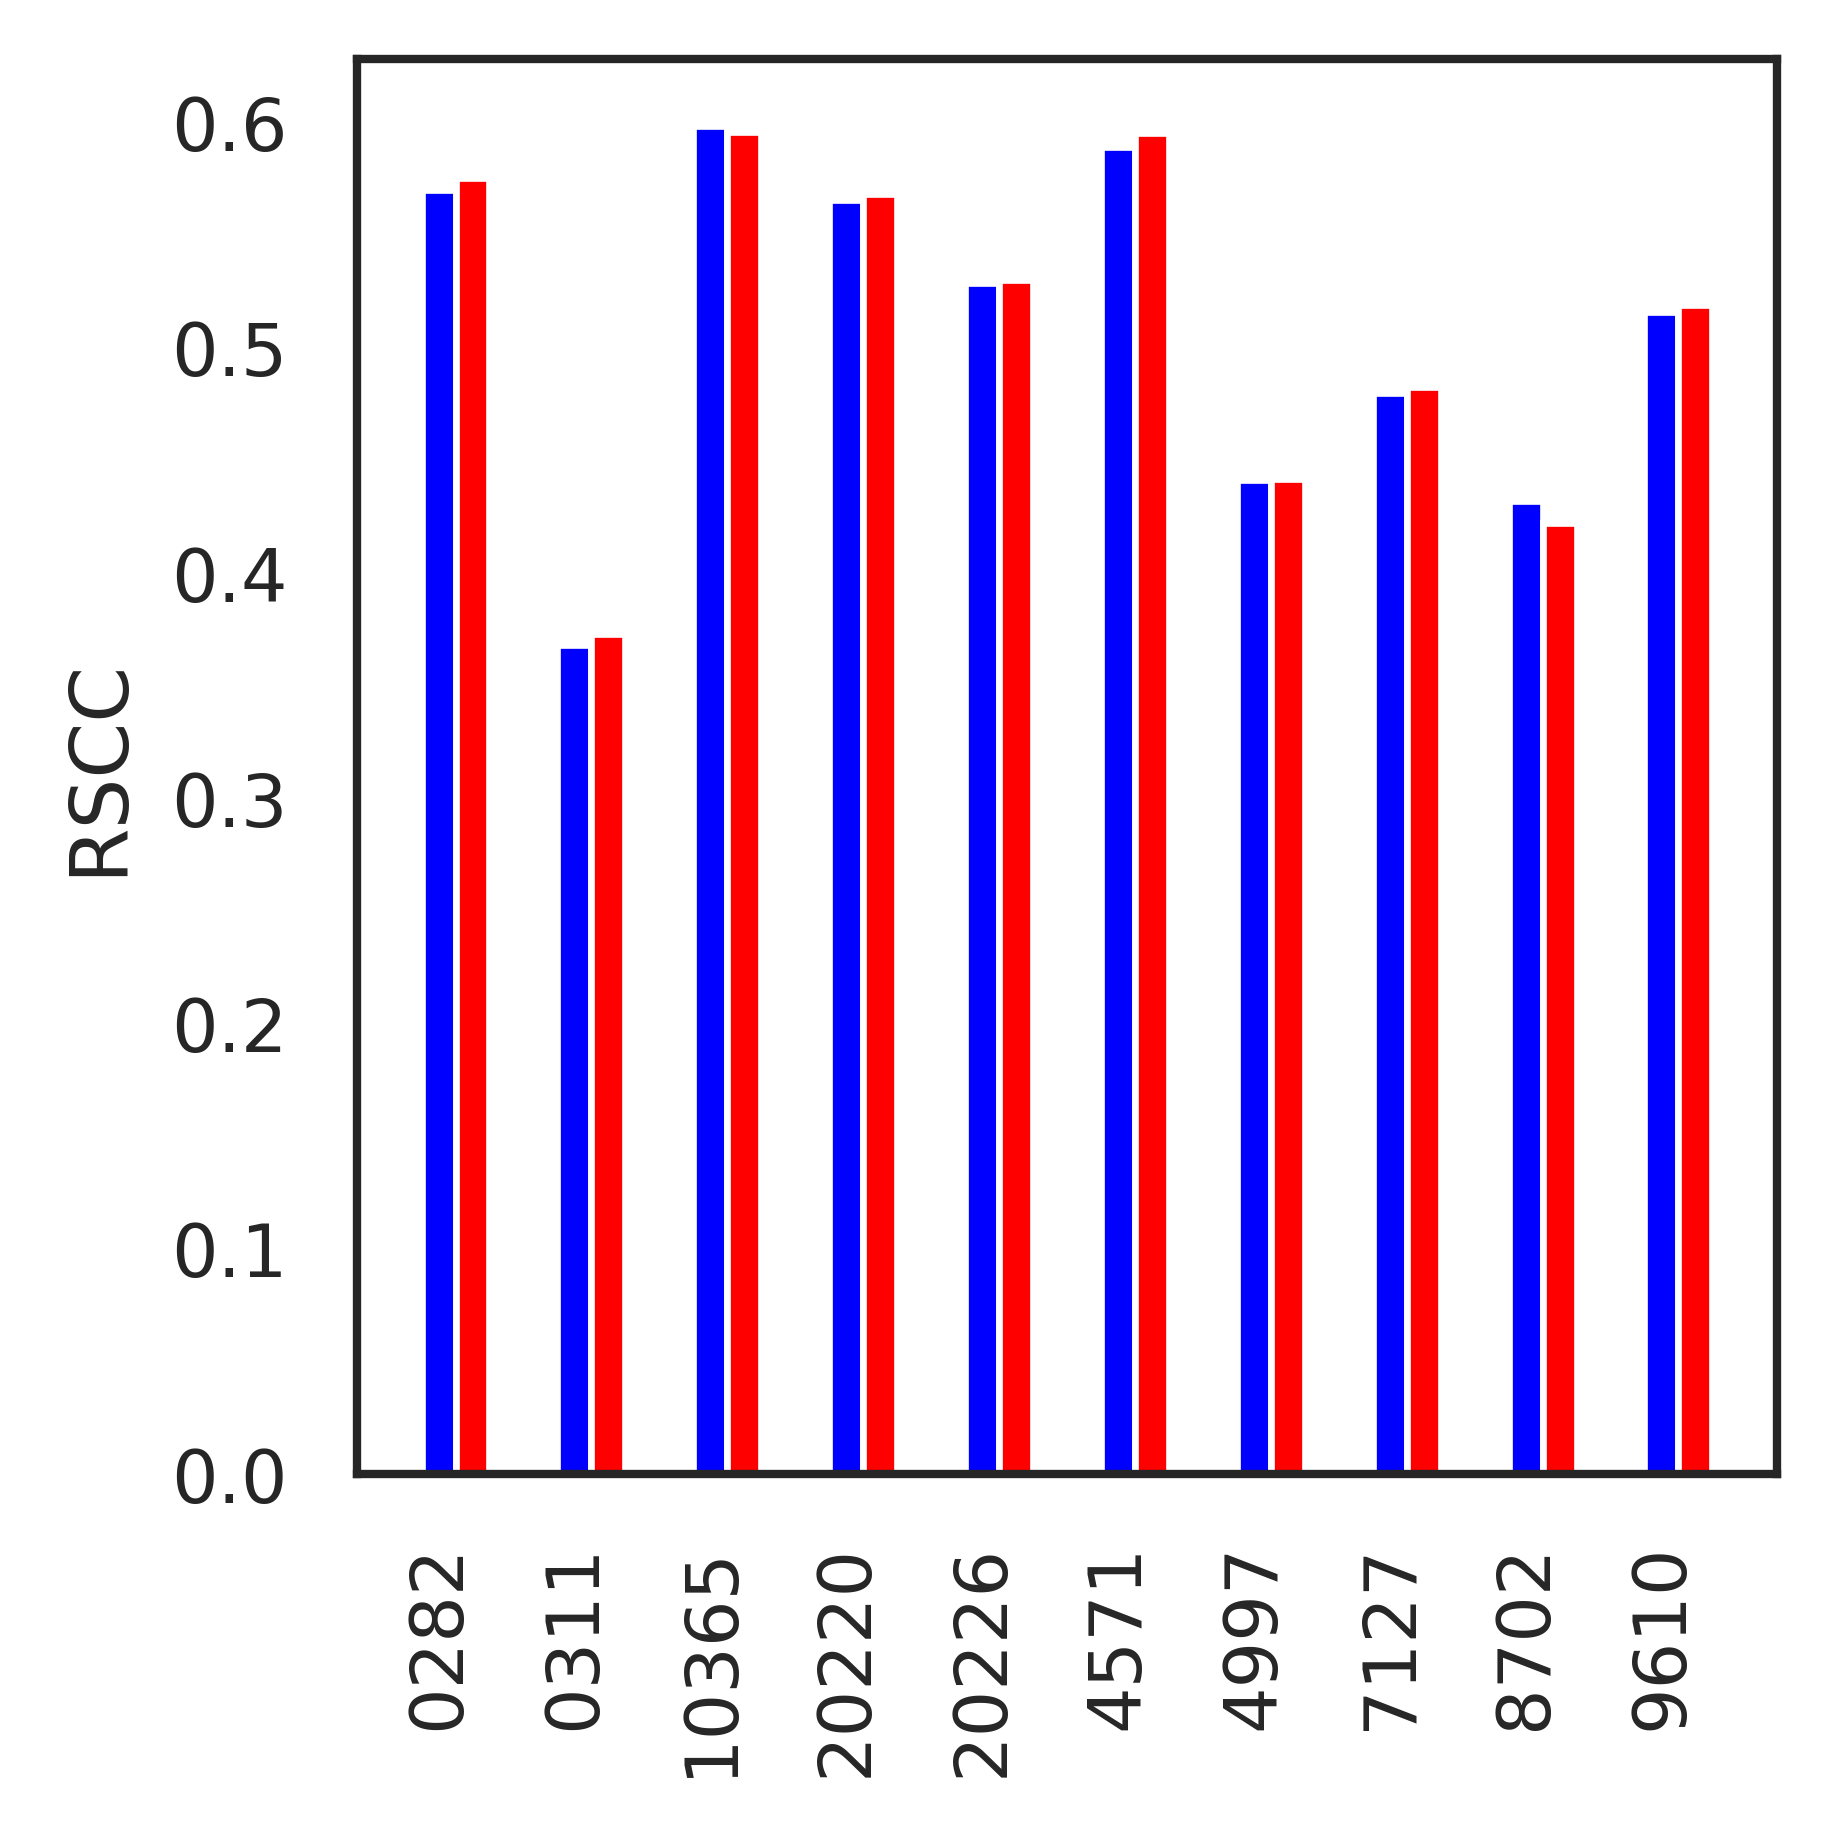

In [32]:
# Plot a horizontal bar plot for the metrics
figsize_cm = (8, 8)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches
fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality

sns.set_theme(context="paper", font="Helvetica", font_scale=1)
# Set font size for all text in the figure
sns.set_style("white")

## Plot the data

# for each EMDB PDB, plot the rscc emmernet hybrid map and rscc emmernet MB map
for i,emdb_pdb in enumerate(emdb_metric.keys()):
    plt.bar(i, rscc_emmernet_hybrid_map[i], color="blue", width=0.25, label="E-Hy")
    plt.bar(i+0.25, rscc_emmernet_MB_map[i], color="red", width=0.25, label="E-MB")
plt.ylabel("RSCC")
plt.xticks(ticks=range(0,len(emdb_metric.keys())), labels=[x.split("_")[0] for x in emdb_metric.keys()], rotation=90)
plt.tight_layout()
plt.savefig("rscc_emmernet.eps", dpi=600, bbox_inches="tight")


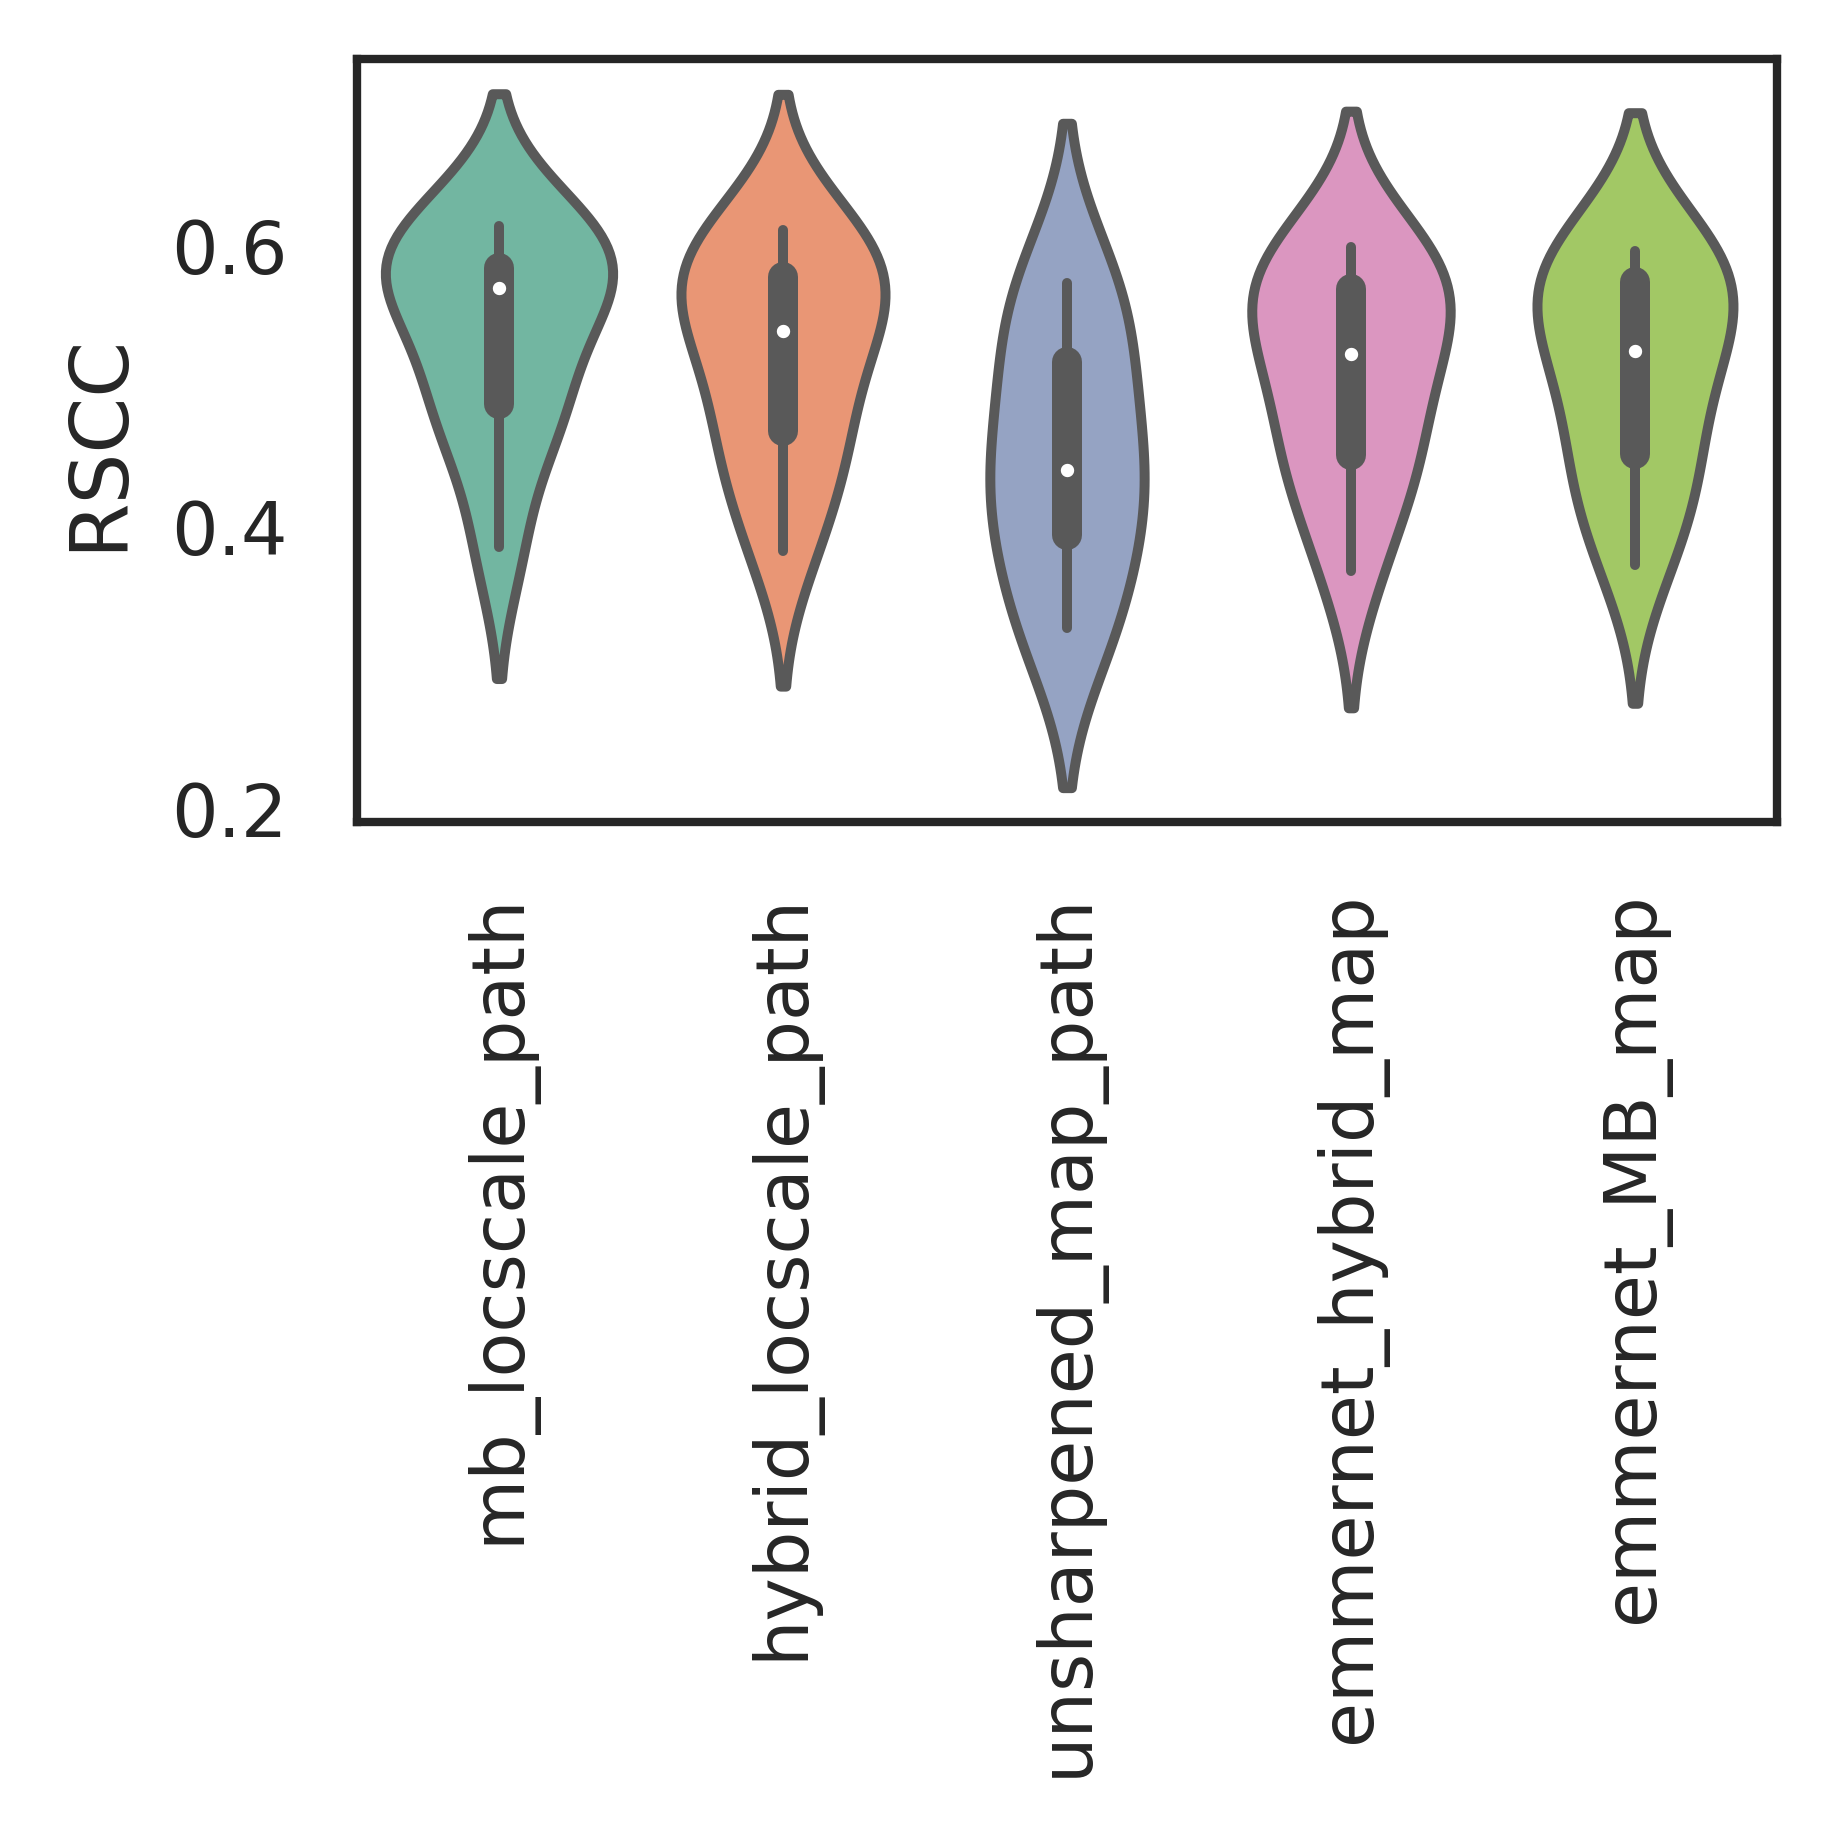

In [11]:
# Plot the rscc metrics for lcoscale and deposited maps as violin plots
figsize_cm = (8, 8)
figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
sns.set_theme(context="paper", font="Helvetica", font_scale=1)
# Set font size for all text in the figure
sns.set_style("white")
rscc_data_list = list(rscc_metrics.values())
## Plot the data
sns.violinplot(data=rscc_data_list, ax=ax1, palette="Set2")
plt.ylabel("RSCC")
plt.xticks(ticks=range(0,len(keys)), labels=keys, rotation=90)
plt.tight_layout()
plt.savefig("rscc_violin_plot_all_locscale.eps", dpi=600, bbox_inches="tight")

In [ ]:
# Plot the kurtosis metrics for all locscale, unsharpened and deposited maps as violin plots
def pretty_plot_violinplot(data):
    figsize_cm = (8, 8)
    figsize = (figsize_cm[0]/2.54, figsize_cm[1]/2.54) # convert cm to inches

    fig, ax1 = plt.subplots(figsize=figsize, dpi=600)  # DPI is fixed to 600 for publication quality
    sns.set_theme(context="paper", font="Helvetica", font_scale=1)
    # Set font size for all text in the figure
    sns.set_style("white")

    ## Plot the data
    sns.violinplot(data=data, ax=ax1, palette="Set2")
    plt.ylabel("RSCC")
    plt.xticks([0, 1, 2], ["Model-based", "Model-free", "Hybrid"])
    plt.tight_layout()

    return fig, ax1

fig, ax1 = pretty_plot_violinplot(
    data=[kurtosis_metrics_deposited_map, kurtosis_metrics_unsharpened_map, kurtosis_metrics_mb_locscale_map, kurtosis_metrics_mf_locscale_map, kurtosis_metrics_hybrid_locscale_map])

ax1.set_ylabel("Kurtosis")
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Deposited", "Unsharpened", "Model-based", "Model-free", "Hybrid"], rotation=45)
plt.tight_layout()
plt.savefig("kurtosis_violin_plot_all.eps", dpi=600, bbox_inches="tight")

    


In [ ]:
# Plot the rscc metrics for all locscale, unsharpened and deposited maps as violin plots
fig, ax1 = pretty_plot_violinplot(
    data=[rscc_metrics_deposited_map, rscc_metrics_unsharpened_map, rscc_metrics_mb_locscale_map, rscc_metrics_mf_locscale_map, rscc_metrics_hybrid_locscale_map])

ax1.set_ylabel("RSCC")
ax1.set_xticks([0, 1, 2, 3, 4])
ax1.set_xticklabels(["Deposited", "Unsharpened", "Model-based", "Model-free", "Hybrid"], rotation=45)
plt.tight_layout()
plt.savefig("rscc_violin_plot_all.eps", dpi=600, bbox_inches="tight")
